# 911 Emergency Calls in Montgomery, PA
## by Julien Both

## Investigation Overview

The dataset contains Emergency 911 calls in Montgomery County located in the Commonwealth of Pennsylvania. The attributes chosen include: type of emergency, time stamp, township where the emergency has occurred.


**About Montgomery County**
Montgomery County, locally also referred to as Montco, is a county located in the Commonwealth of Pennsylvania. As of the 2010 census, the population was 799,874, making it the third-most populous county in Pennsylvania, after Philadelphia and Allegheny Counties. The county seat is Norristown. Montgomery County is very diverse, ranging from farms and open land in Upper Hanover to densely populated rowhouse streets in Cheltenham.

## Dataset Overview

The data consists of information regarding 663522 Emergency Calls from 10.12.2015 to 29.07.2020 for Montgomery County, PA including latitude, longitude, description, zip, title, timestamp, commune and adress

The dataset comes from kaggle [here](https://www.kaggle.com/mchirico/montcoalert) The dataset was approved by  Udactiy mentor Michal K. [here](https://knowledge.udacity.com/questions/299578)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv("911-clean.csv")
print(df_clean.date.min())
print(df_clean.date.max())

2015-12-10
2020-07-29


##  911 Emergency Calls - types

EMS has the most calls in the period, followed by traffic incidents and the least amount of emergency calls are fire alarms.

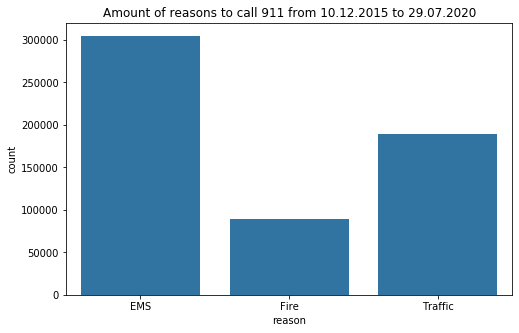

In [3]:
plt.figure(figsize=[8, 5])
base_color = sns.color_palette()[0]
sns.countplot(x='reason',data=df_clean, color = base_color);
plt.title('Amount of reasons to call 911 from 10.12.2015 to 29.07.2020');

## Emergency calls per communes

23 of the 68 communes had more than 10000 calls. Lower Merion has the most calls overall followed by Abington, which has signficant less calls. Lehigh County seems to be the safest commune with the least amount of calls

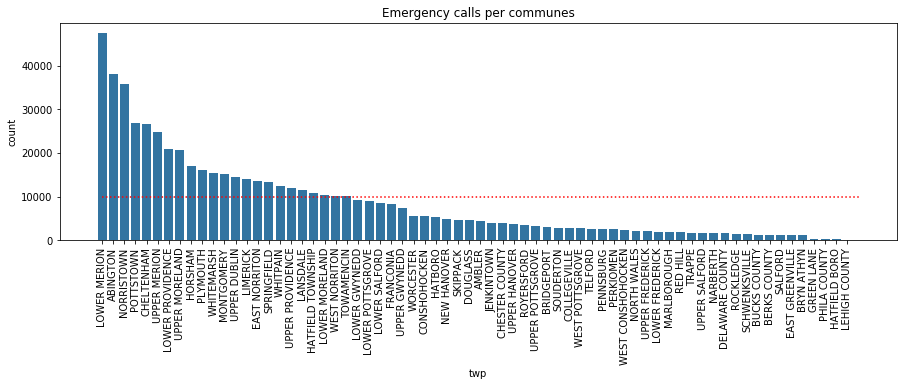

In [4]:
plt.figure(figsize= (15,4));
base_color = sns.color_palette()[0]
sns.countplot(x='twp',data=df_clean, color = base_color, order = df_clean['twp'].value_counts().index);
plt.xticks(rotation=90);
plt.title('Emergency calls per communes');
plt.hlines(y=10000, xmin=0, xmax=68, linestyles='dotted', colors='red');

## Type of call and weekdays

Each type of call has the highest amount of emergency calls on friday. Traffic calls have a signifcant lower amount on weekends. EMS is close to constant between all days. Fire calls are on average 4 times less likely than EMS.

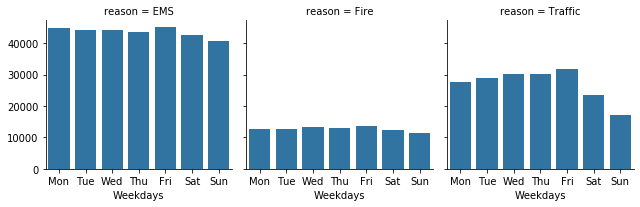

In [13]:
order_days = ["Mon","Tue","Wed", "Thu","Fri","Sat","Sun"];
g = sns.FacetGrid(data = df_clean, col = "reason");
g.map(sns.countplot,'DayofWeek_abb', order=order_days);
g.axes[0,0].set_xlabel('Weekdays');
g.axes[0,1].set_xlabel('Weekdays');
g.axes[0,2].set_xlabel('Weekdays');

## Amount of Calls in the period per day

In Average there are between 250 and 500 calls a day. But there are three big outlier 02.03.2018, 15.11.2018 and 03.06.2020

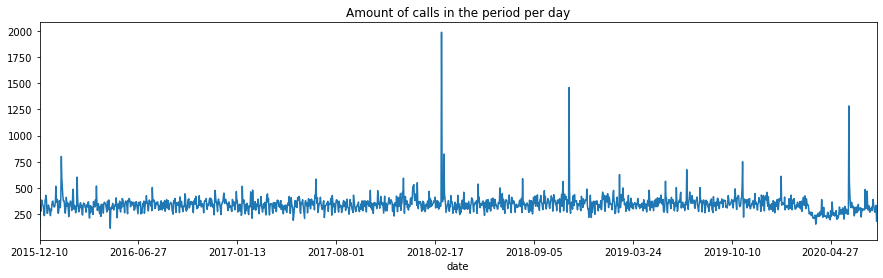

In [6]:
plt.figure(figsize= (15,4));
df_clean.groupby('date').count()['twp'].plot()
base_color = sns.color_palette()[0]
plt.title ("Amount of calls in the period per day");

In [7]:
reason_date =df_clean.groupby(['date',"reason"]).count()
reason_date.reset_index(inplace=True)

As we can see in this diagram, the rapid increase of the emergency calls at the three days: 02.03.2018, 15.11.2018 and 03.06.2020 come from traffic accidents and two times in combination with fire alarm calls


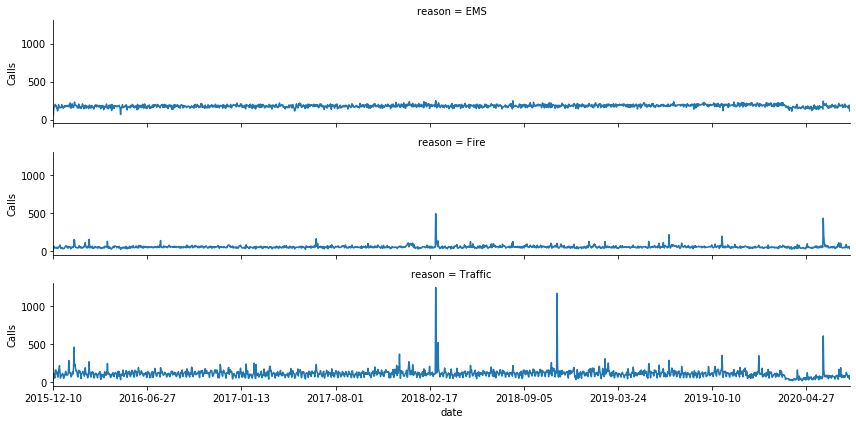

In [14]:
def dateplot(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)

g = sns.FacetGrid(data = reason_date, row = "reason", height = 2, aspect =6)
g = g.map_dataframe(dateplot, 'date',"twp")

g.axes[0,0].set_ylabel('Calls');
g.axes[1,0].set_ylabel('Calls');
g.axes[2,0].set_ylabel('Calls');


## Heatmaps
The next subslides will show different comparisions of Heatmaps for each of the different types. In the multiveriate visualisation i wanted to see whether there is a difference for the three reason in terms of the day of Month and the time of the day. As well as the same for the weekday and the different times

1. Hour of the Day to Day of the Month
2. Hour to Weekday


In [9]:
EMS_day_hour = df_clean.query("reason=='EMS'").groupby(by=['Day','Hour']).count()['reason'].unstack()
Fire_day_hour = df_clean.query("reason=='Fire'").groupby(by=['Day','Hour']).count()['reason'].unstack()
Traffic_day_hour = df_clean.query("reason=='Traffic'").groupby(by=['Day','Hour']).count()['reason'].unstack()

### Heatmap 1 - Hour of the Day to Day of the Month
EMS calls increases at around 8 o'clock and has it peak between 10-12 am. There is no hugh different between the days of the month. Fire alarms seems to have a peak at the start of the month but is relativly constant. Traffic alarms havea peak at 15th of the months in the afternoon hours.

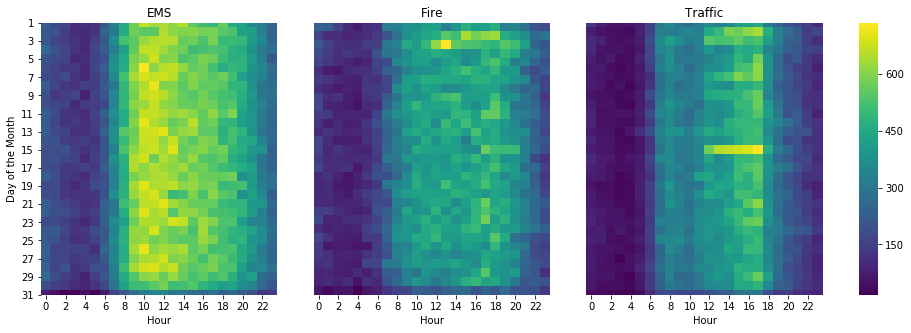

In [10]:
f,(ax1,ax2,ax3, axcb) = plt.subplots(1,4, 
            gridspec_kw={'width_ratios':[1,1,1,0.08]}, figsize=(15,5))
ax1.get_shared_y_axes().join(ax2,ax3)
g1 = sns.heatmap(EMS_day_hour,cmap="viridis",cbar=False,ax=ax1)
g1.set_ylabel('Day of the Month')
g1.set_xlabel('Hour')
g1.set_title('EMS')
g2 = sns.heatmap(Fire_day_hour,cmap="viridis",cbar=False,ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('Hour')
g2.set_title('Fire')
g2.set_yticks([])
g3 = sns.heatmap(Traffic_day_hour,cmap="viridis",ax=ax3, cbar_ax=axcb)
g3.set_ylabel('')
g3.set_xlabel('Hour')
g3.set_title('Traffic')
g3.set_yticks([])

# may be needed to rotate the ticklabels correctly:
for ax in [g1,g2,g3]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

plt.show()

### Heatmap 2 - Hour to Weekday

Interesting to see is that EMS calls mostly happens shortly before noon on weekdays, Fire alarms have a high probability to happen wednesday between 14-18 o'clock. Traffic alarms are most likely fridays between 14-18. There are way less traffic alarms on weekends.

In [11]:
EMS_dayofweek_hour = df_clean.query("reason=='EMS'").groupby(by=['DayofWeek','Hour']).count()['reason'].unstack()
Fire_dayofweek_hour = df_clean.query("reason=='Fire'").groupby(by=['DayofWeek','Hour']).count()['reason'].unstack()
Traffic_dayofweek_hour = df_clean.query("reason=='Traffic'").groupby(by=['DayofWeek','Hour']).count()['reason'].unstack()

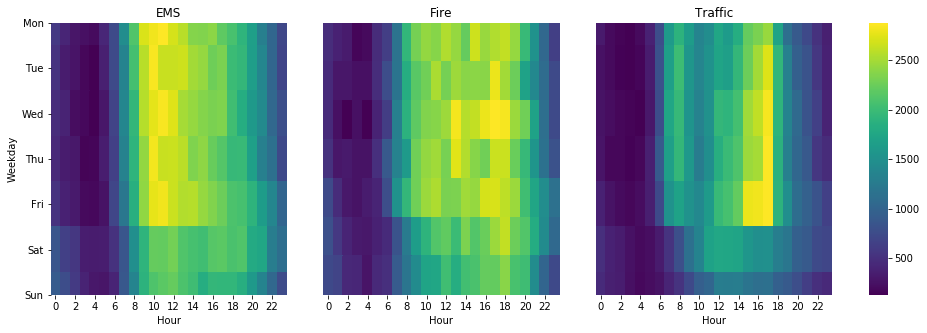

In [12]:
f,(ax1,ax2,ax3, axcb) = plt.subplots(1,4, 
            gridspec_kw={'width_ratios':[1,1,1,0.08]}, figsize=(15,5))
ax1.get_shared_y_axes().join(ax2,ax3)
g1 = sns.heatmap(EMS_dayofweek_hour,cmap="viridis",cbar=False,ax=ax1, yticklabels=order_days)
g1.set_ylabel('Weekday')
g1.set_xlabel('Hour')
g1.set_title('EMS')
g2 = sns.heatmap(Fire_dayofweek_hour,cmap="viridis",cbar=False,ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('Hour')
g2.set_title('Fire')
g2.set_yticks([])
g3 = sns.heatmap(Traffic_dayofweek_hour,cmap="viridis",ax=ax3, cbar_ax=axcb)
g3.set_ylabel('')
g3.set_xlabel('Hour')
g3.set_title('Traffic')
g3.set_yticks([])

# may be needed to rotate the ticklabels correctly:
for ax in [g1,g2,g3]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!